In [40]:
# Imports 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay



# 1) Load the data and explore them, showing size, structure and histograms of numeric data; show the histogram of the frequencies of the class labels, contained in the “language” column.

The dataset has 329 and 13 columns


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,321.000000,329.000000,329.000000
mean,5.645227,-4.270814,2.635319,7.200207,-5.648733,9.810236,-9.408053,5.117328,-1.229432,-2.411215,2.430833,-3.980415
std,5.105302,3.514350,3.635323,4.310095,4.596180,3.624654,2.484117,2.650608,3.634849,5.027840,3.478467,2.985879
min,-6.067831,-14.972962,-6.186583,-8.844231,-15.656596,-3.528964,-15.365665,-2.873862,-15.510974,-11.429178,-13.664104,-13.724103
25%,2.065603,-6.515764,0.137042,4.700874,-8.417684,8.643563,-11.120860,3.482167,-1.749082,-5.090180,1.197789,-5.941409
50%,4.954206,-4.252512,2.029268,7.804680,-6.786670,10.379330,-9.710399,4.843103,-0.389970,-3.327718,3.169703,-4.374334
75%,9.793648,-1.560250,4.178026,10.129165,-4.463308,11.784360,-7.989370,6.588931,0.779993,-1.512083,4.673452,-2.191658
max,17.749851,3.570765,17.066487,16.178942,7.912809,21.445837,-0.424033,13.846083,4.789989,16.326455,9.166066,5.259430


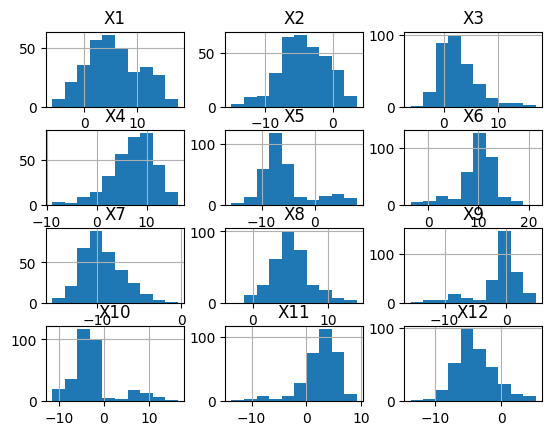

In [41]:
df = pd.read_csv('./exam2022_01_13.csv')

print(f"The dataset has {df.shape[0]} and {df.shape[1]} columns")

df.drop('language', axis=1).hist()

df.describe()

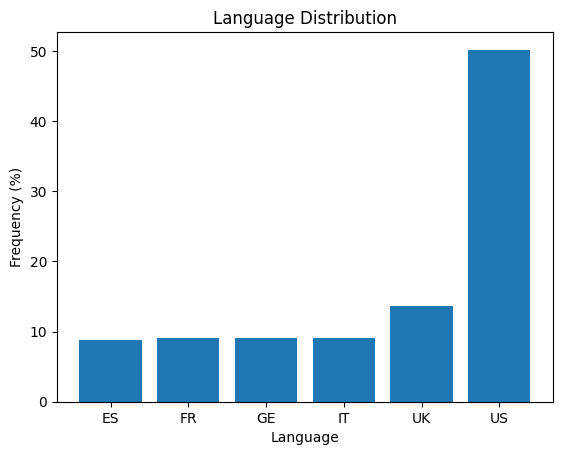

In [42]:
vals, n_occ = np.unique(df['language'], return_counts=True)
n_occ_percentage = n_occ / df.shape[0] * 100  # freq

# Hist
plt.bar(vals, n_occ_percentage)
plt.xlabel('Language')
plt.ylabel('Frequency (%)')
plt.title('Language Distribution')
plt.show()



# 2) Drop the rows with NaN values, if any, show the shape of the dataset after this cleaning.

In [43]:
df.dropna(axis=0, inplace=True)
print(f"Now the dataset has {df.shape[0]} and {df.shape[1]} columns")

Now the dataset has 321 and 13 columns


# 3) tune the hyper–parameters of Model1 with Cross Validation on the training set, optimize for recall_macro.

In [44]:
random_state = 42

model_names = ['dt', 'knn']

models  = {
    'dt': {'name': 'Decision Tree',
           'estimator': DecisionTreeClassifier(random_state=random_state), 
           'param': [{
               'max_depth': [*range(1,20)],
               'class_weight':[None,'balanced']
            }],
    },
    'knn': {'name': 'K-Nearest-Neighbors',
           'estimator': KNeighborsClassifier(), 
           'param': [{
               'n_neighbors': [*range(1,7)]
            }],
    }
}

y = df['language']
X = df.drop('language', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=random_state)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix


classification_reports = {}
confusion_matrices = {}

for m in model_names :
    # Use Cross Validation to find best estimator
    clf = GridSearchCV(estimator=models[m]['estimator'], 
                       param_grid=models[m]['param'],
                       cv=3,
                       scoring='recall_macro')
    
    clf.fit(X_train,y_train)
    e = clf.best_estimator_

    # Use best estimator 
    y_pred = e.predict(X_test)
    classification_reports[m] = classification_report(y_test, y_pred)
    confusion_matrices[m] = confusion_matrix(y_test, y_pred)

# 4) produce a classification report for Model1 on the test set

In [46]:
print(classification_reports['dt'])

              precision    recall  f1-score   support

          ES       0.44      0.50      0.47         8
          FR       0.67      0.86      0.75         7
          GE       0.50      0.44      0.47         9
          IT       0.60      0.27      0.37        11
          UK       0.50      0.50      0.50         6
          US       0.75      0.82      0.79        40

    accuracy                           0.65        81
   macro avg       0.58      0.57      0.56        81
weighted avg       0.65      0.65      0.64        81



# 5) roduce the confusion matrix for Model1 on the test set

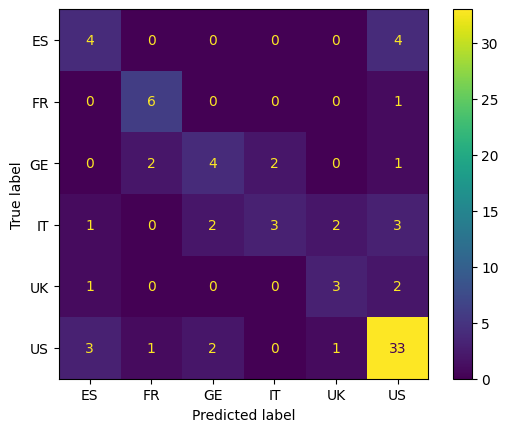

In [47]:
ConfusionMatrixDisplay(confusion_matrices['dt'], display_labels=np.unique(y)).plot()

# 6)  une the hyper–parameters of Model2 with Cross Validation on the training set, optimize for recall_macro 

Already done in point 3     ;)

# 7) produce a classification report for Model2 on the test set .

In [48]:
print(classification_reports['knn'])

              precision    recall  f1-score   support

          ES       0.86      0.75      0.80         8
          FR       0.88      1.00      0.93         7
          GE       0.64      0.78      0.70         9
          IT       0.89      0.73      0.80        11
          UK       0.50      0.50      0.50         6
          US       0.90      0.90      0.90        40

    accuracy                           0.83        81
   macro avg       0.78      0.78      0.77        81
weighted avg       0.83      0.83      0.83        81



# 8) produce the confusion matrix for Model2 on the test set . 

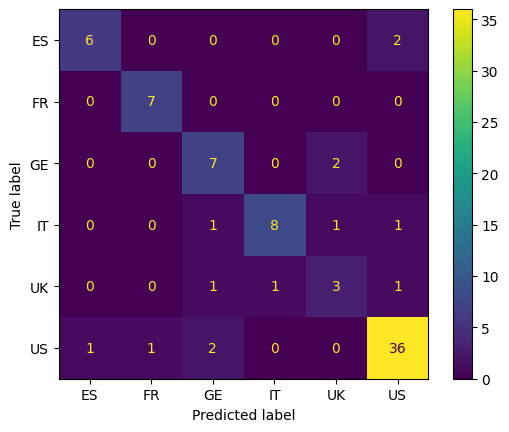

In [49]:
ConfusionMatrixDisplay(confusion_matrices['knn'], display_labels=np.unique(y)).plot()